In [1]:
#############  1. Data Preprocessing  ###########

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('C:/Users/sravy/Downloads/diabetes.csv')



In [4]:
# Display the first few rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# Exploratory Data Analysis (EDA)

# Check basic statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Check for duplicate values
print(df.duplicated().sum())


0


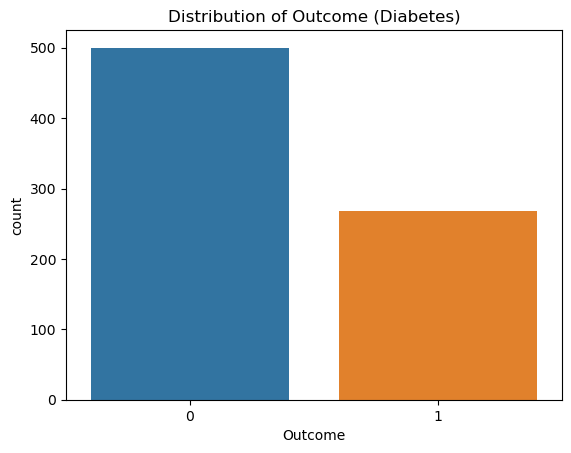

In [8]:
# Visualize the distribution of the target variable (Outcome)
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome (Diabetes)')
plt.show()

/Users/nicoworks/Documents/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


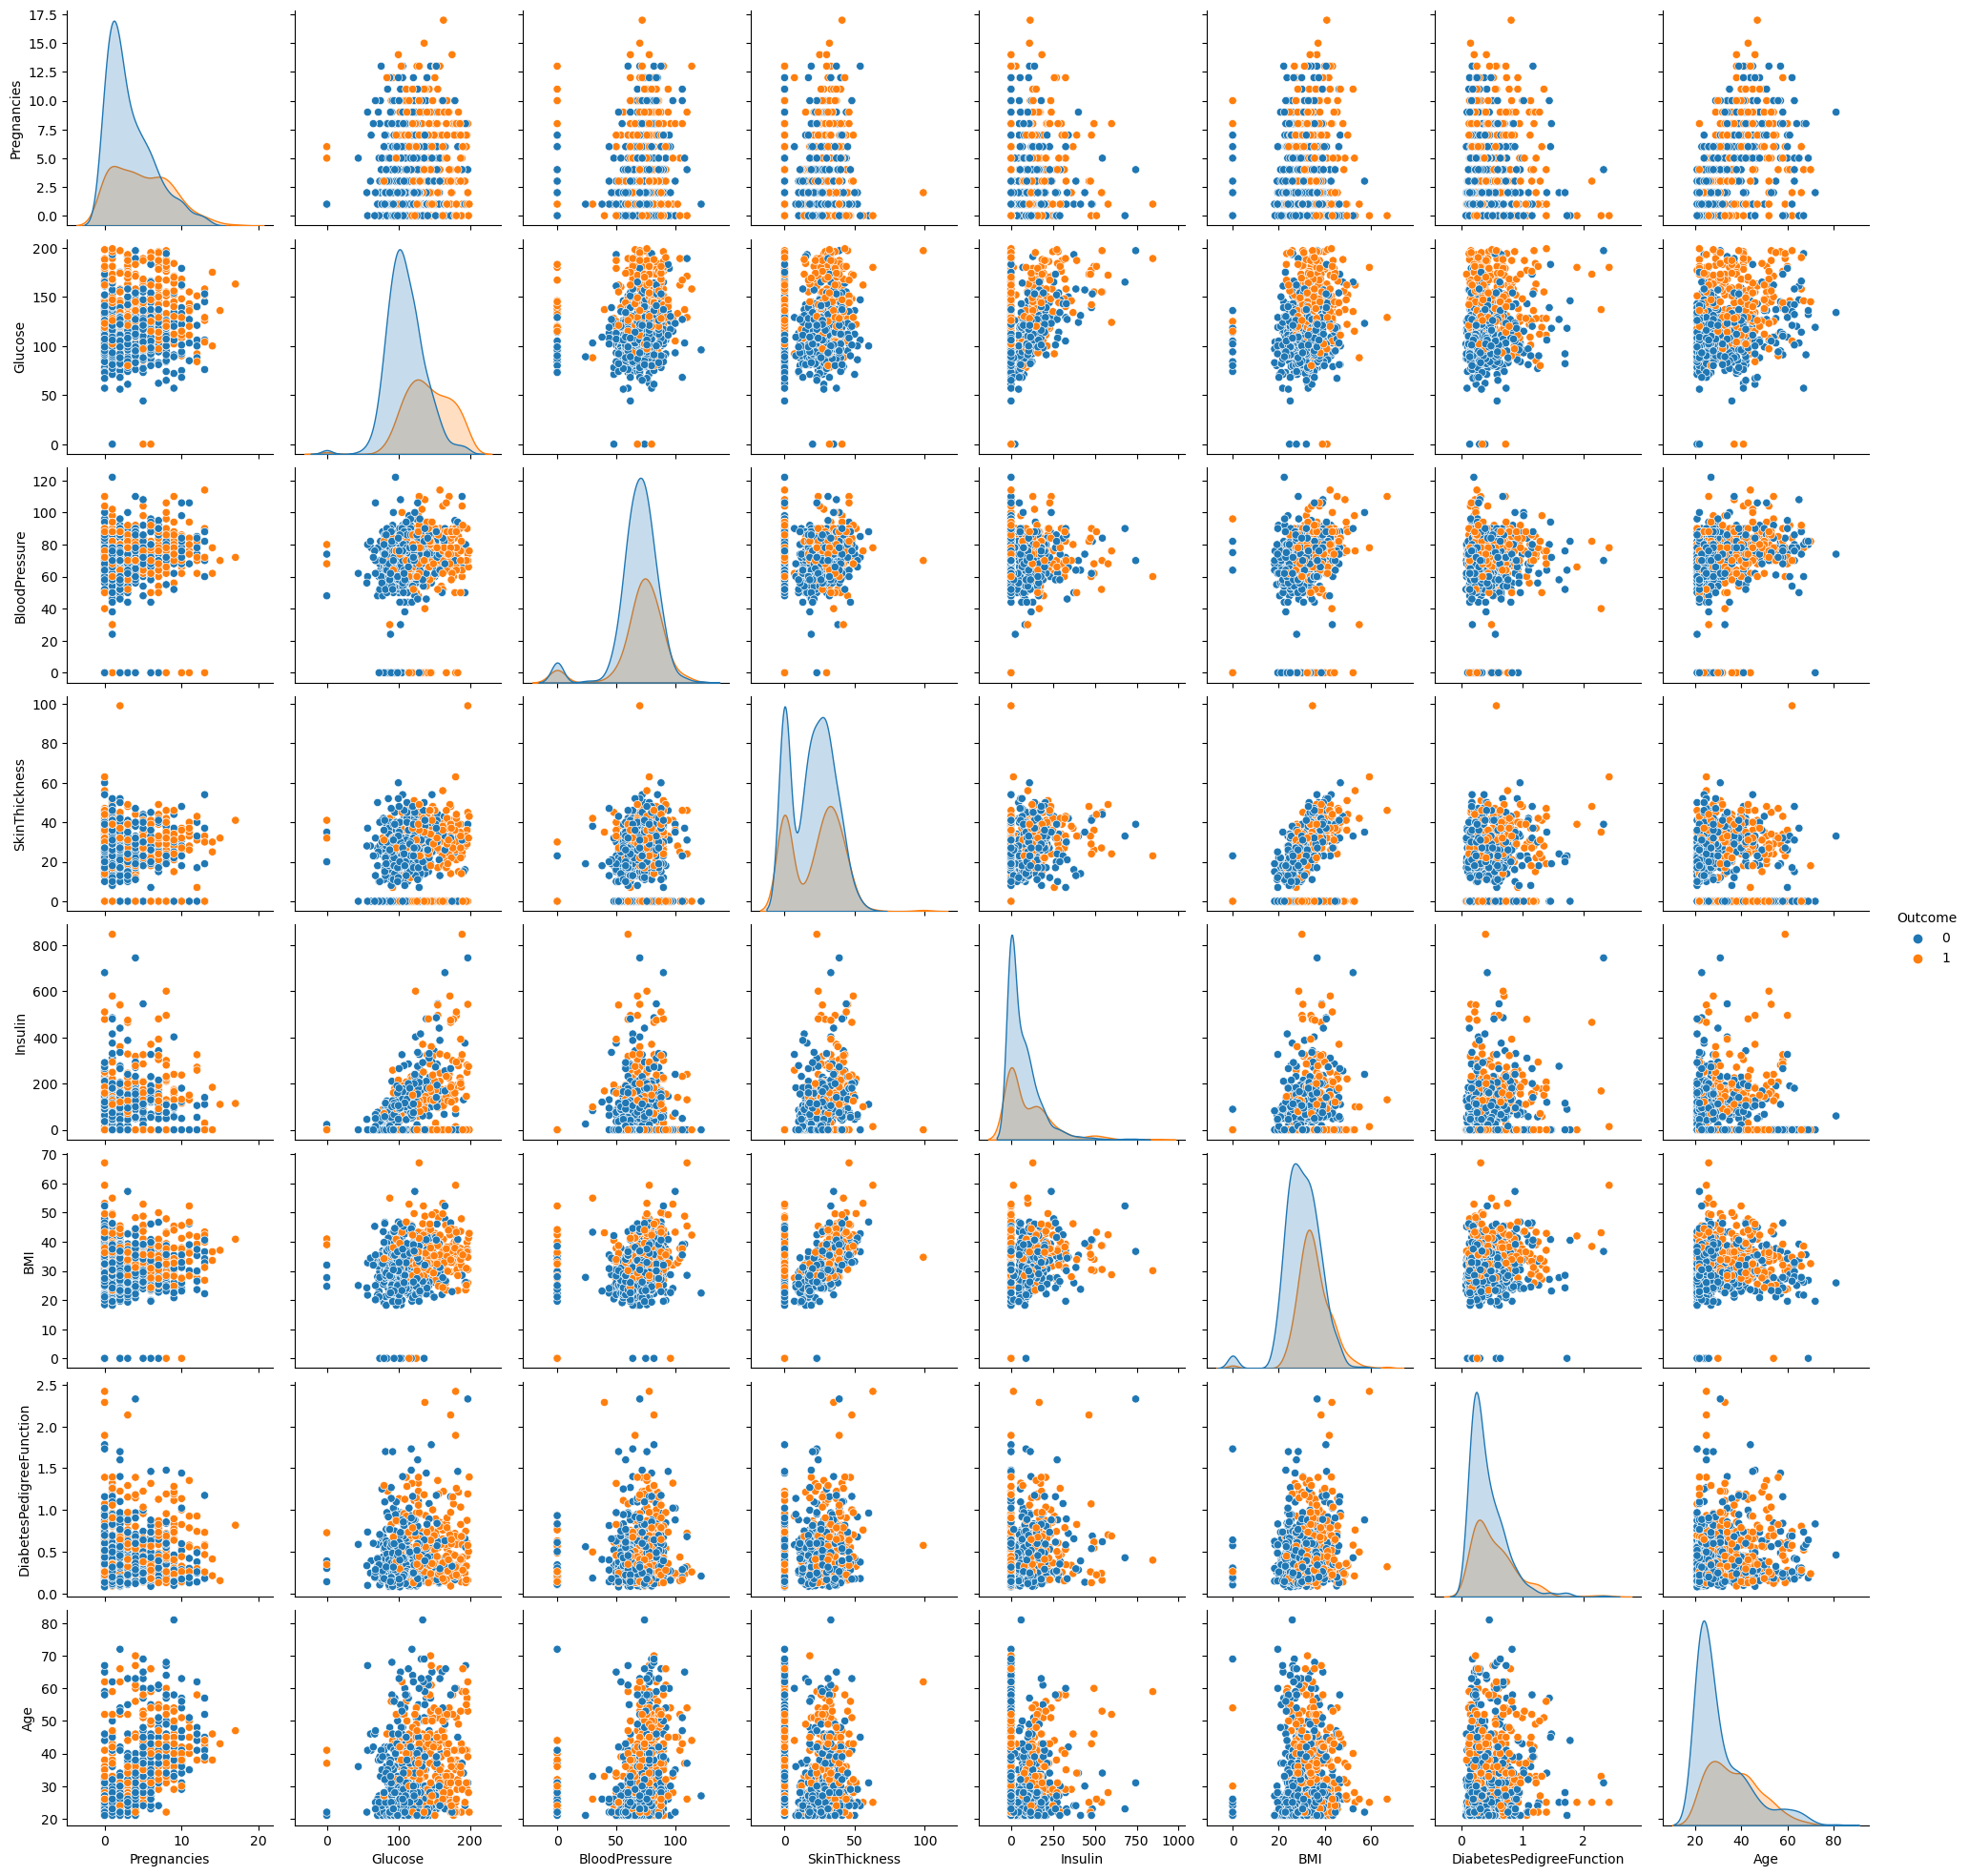

In [9]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome')
plt.show()

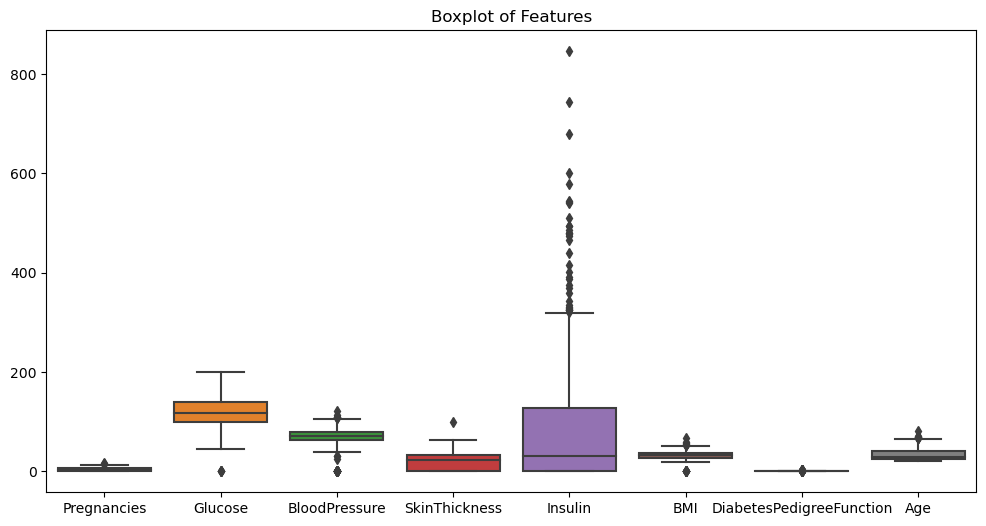

In [10]:
## Handle Outliers ##
# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.title('Boxplot of Features')
plt.show()

In [11]:
# Handle outliers (e.g., using IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
#Check for data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
###### Data Normalization/Standardizationfrom ####

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
### Split the Dataset ####

from sklearn.model_selection import train_test_split

# Split into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (447, 8), (447,)
Validation set: (96, 8), (96,)
Test set: (96, 8), (96,)


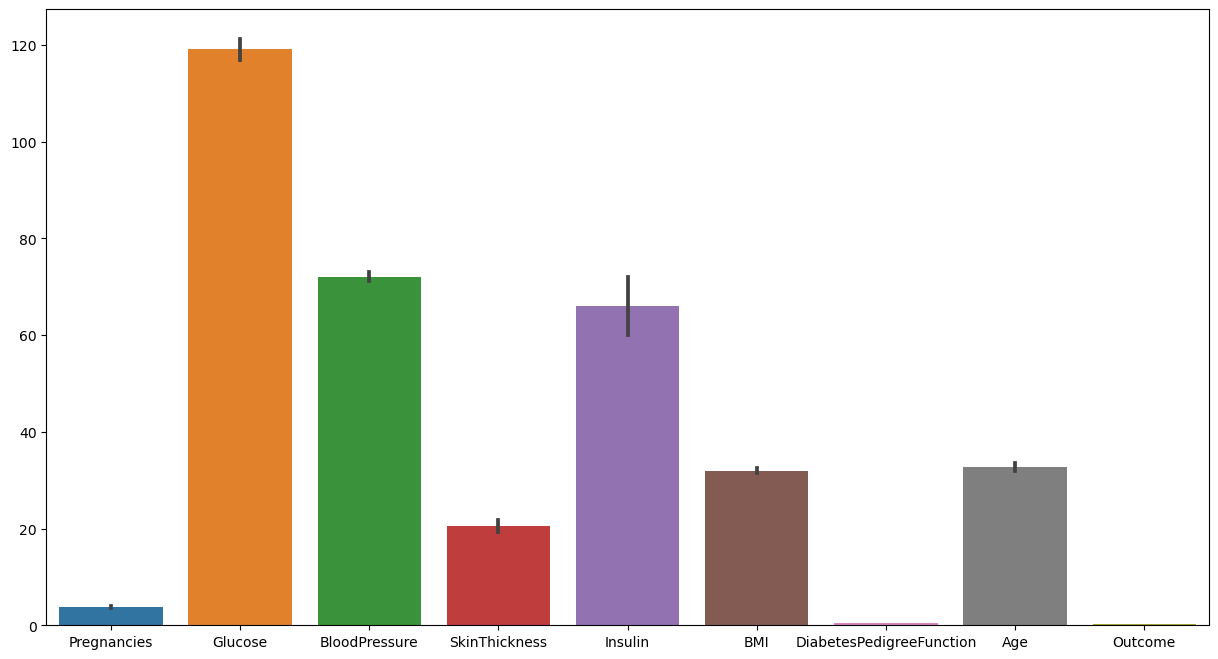

In [16]:
plt.figure(figsize = (15,8))
sns.barplot(df)
plt.show()

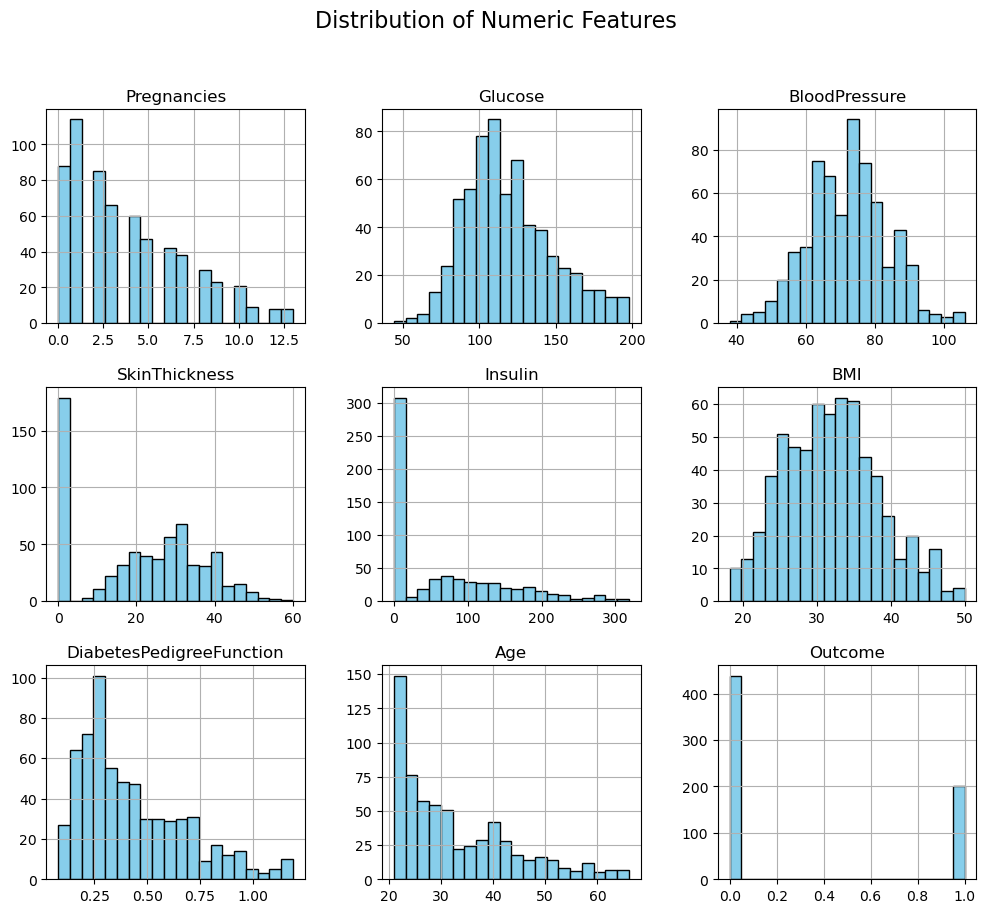

In [17]:
# Plot 1 - Distribution of numeric features
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


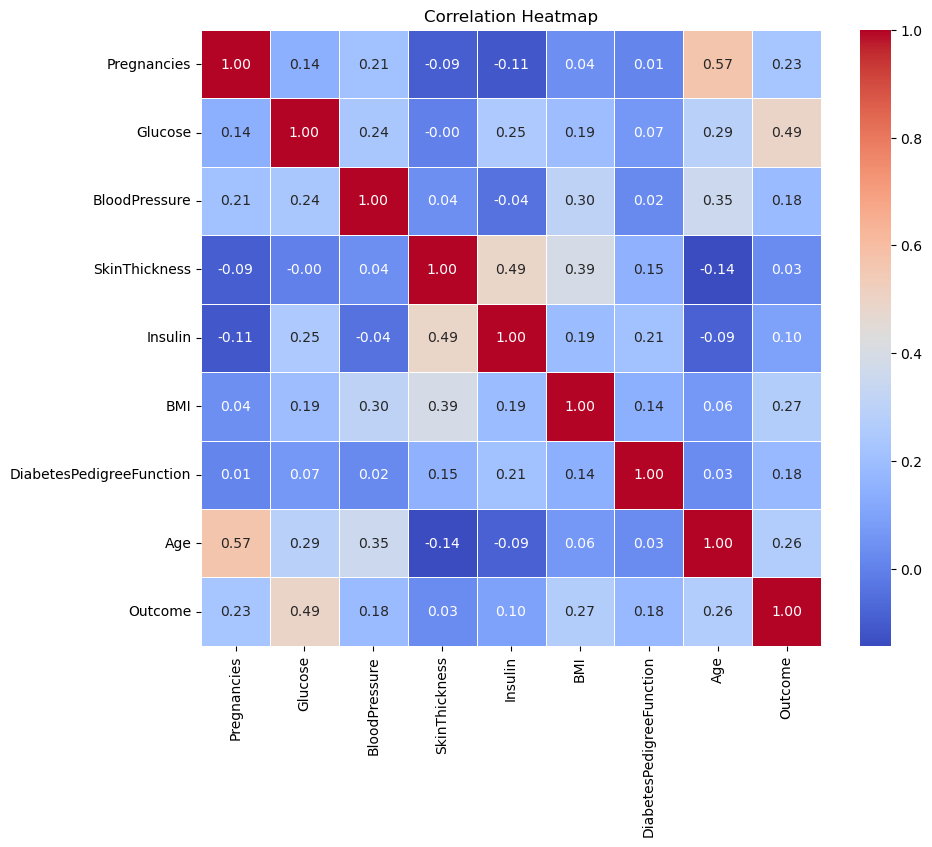

In [18]:
# Plot 2 - Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

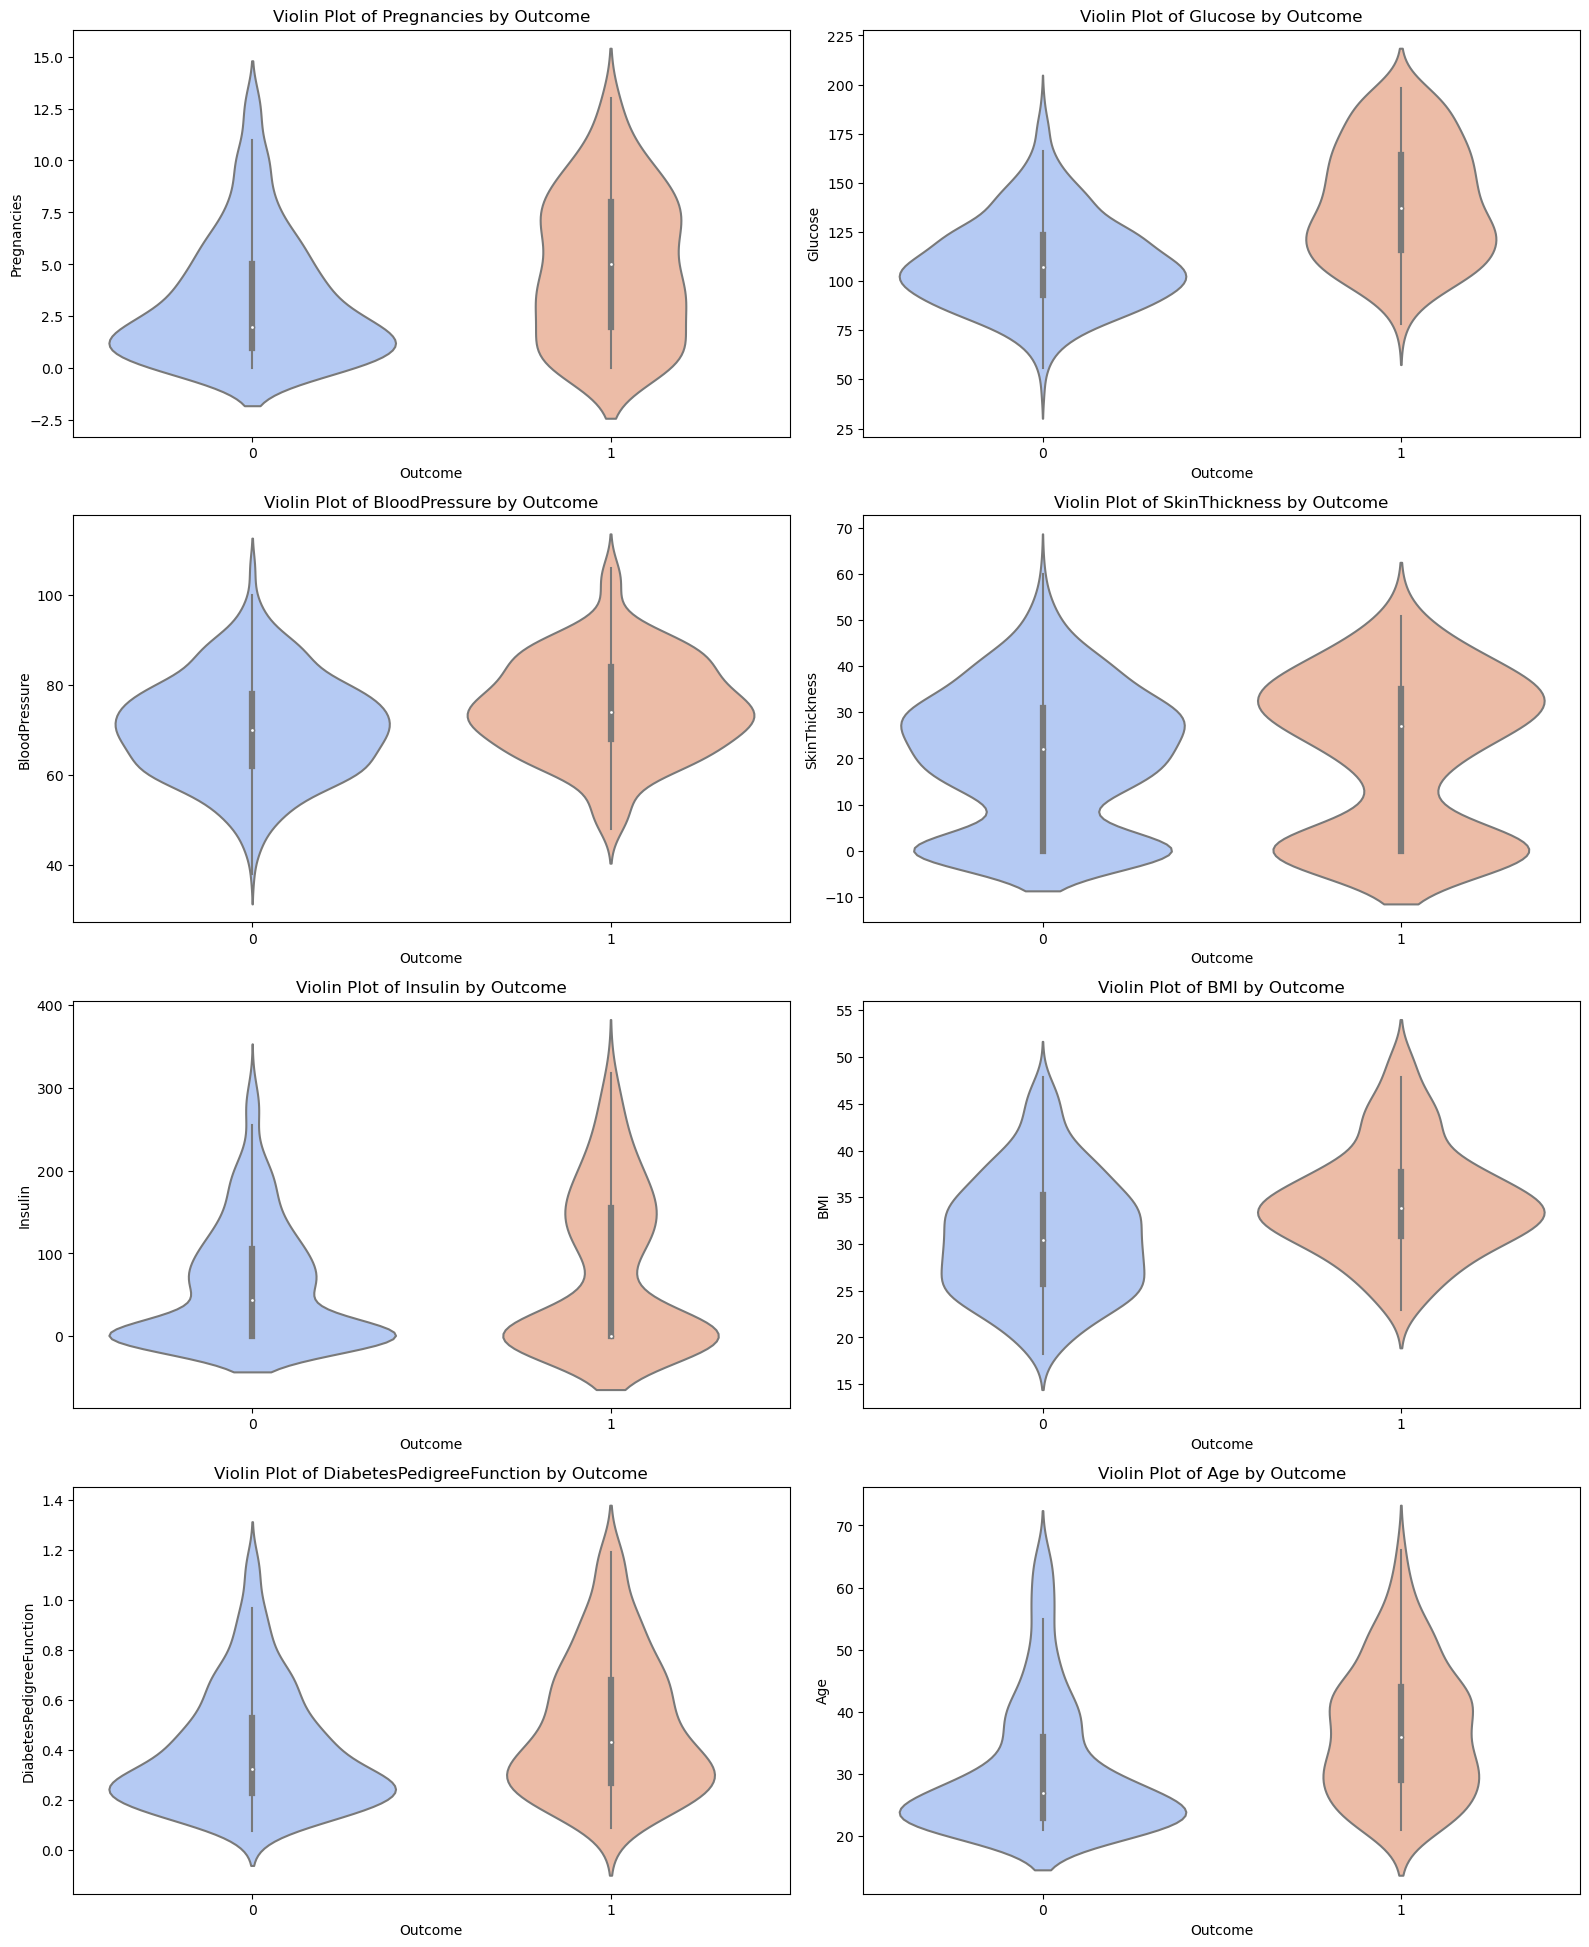

In [19]:
# Plot 3 - Violin plots for each feature by Outcome
plt.figure(figsize=(16, 24))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(x='Outcome', y=col, data=df, palette='coolwarm')
    plt.title(f'Violin Plot of {col} by Outcome')
plt.tight_layout()
plt.show()

/var/folders/m8/l1v0dvpd30b7rh8xc3v5kqtm0000gp/T/ipykernel_53909/4250704251.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue')
/var/folders/m8/l1v0dvpd30b7rh8xc3v5kqtm0000gp/T/ipykernel_53909/4250704251.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue')
/var/folders/m8/l1v0dvpd30b7rh8xc3v5kqtm0000gp/T/ipykernel_53909/4250704251.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True, color='skyblue')
/var/folders/m8/l1v0dvpd30b7rh8xc3v5kqtm0000gp/T/ipykernel_53909/4250704251.py:8: FutureWarning: 

`shade` is now deprecated in fa

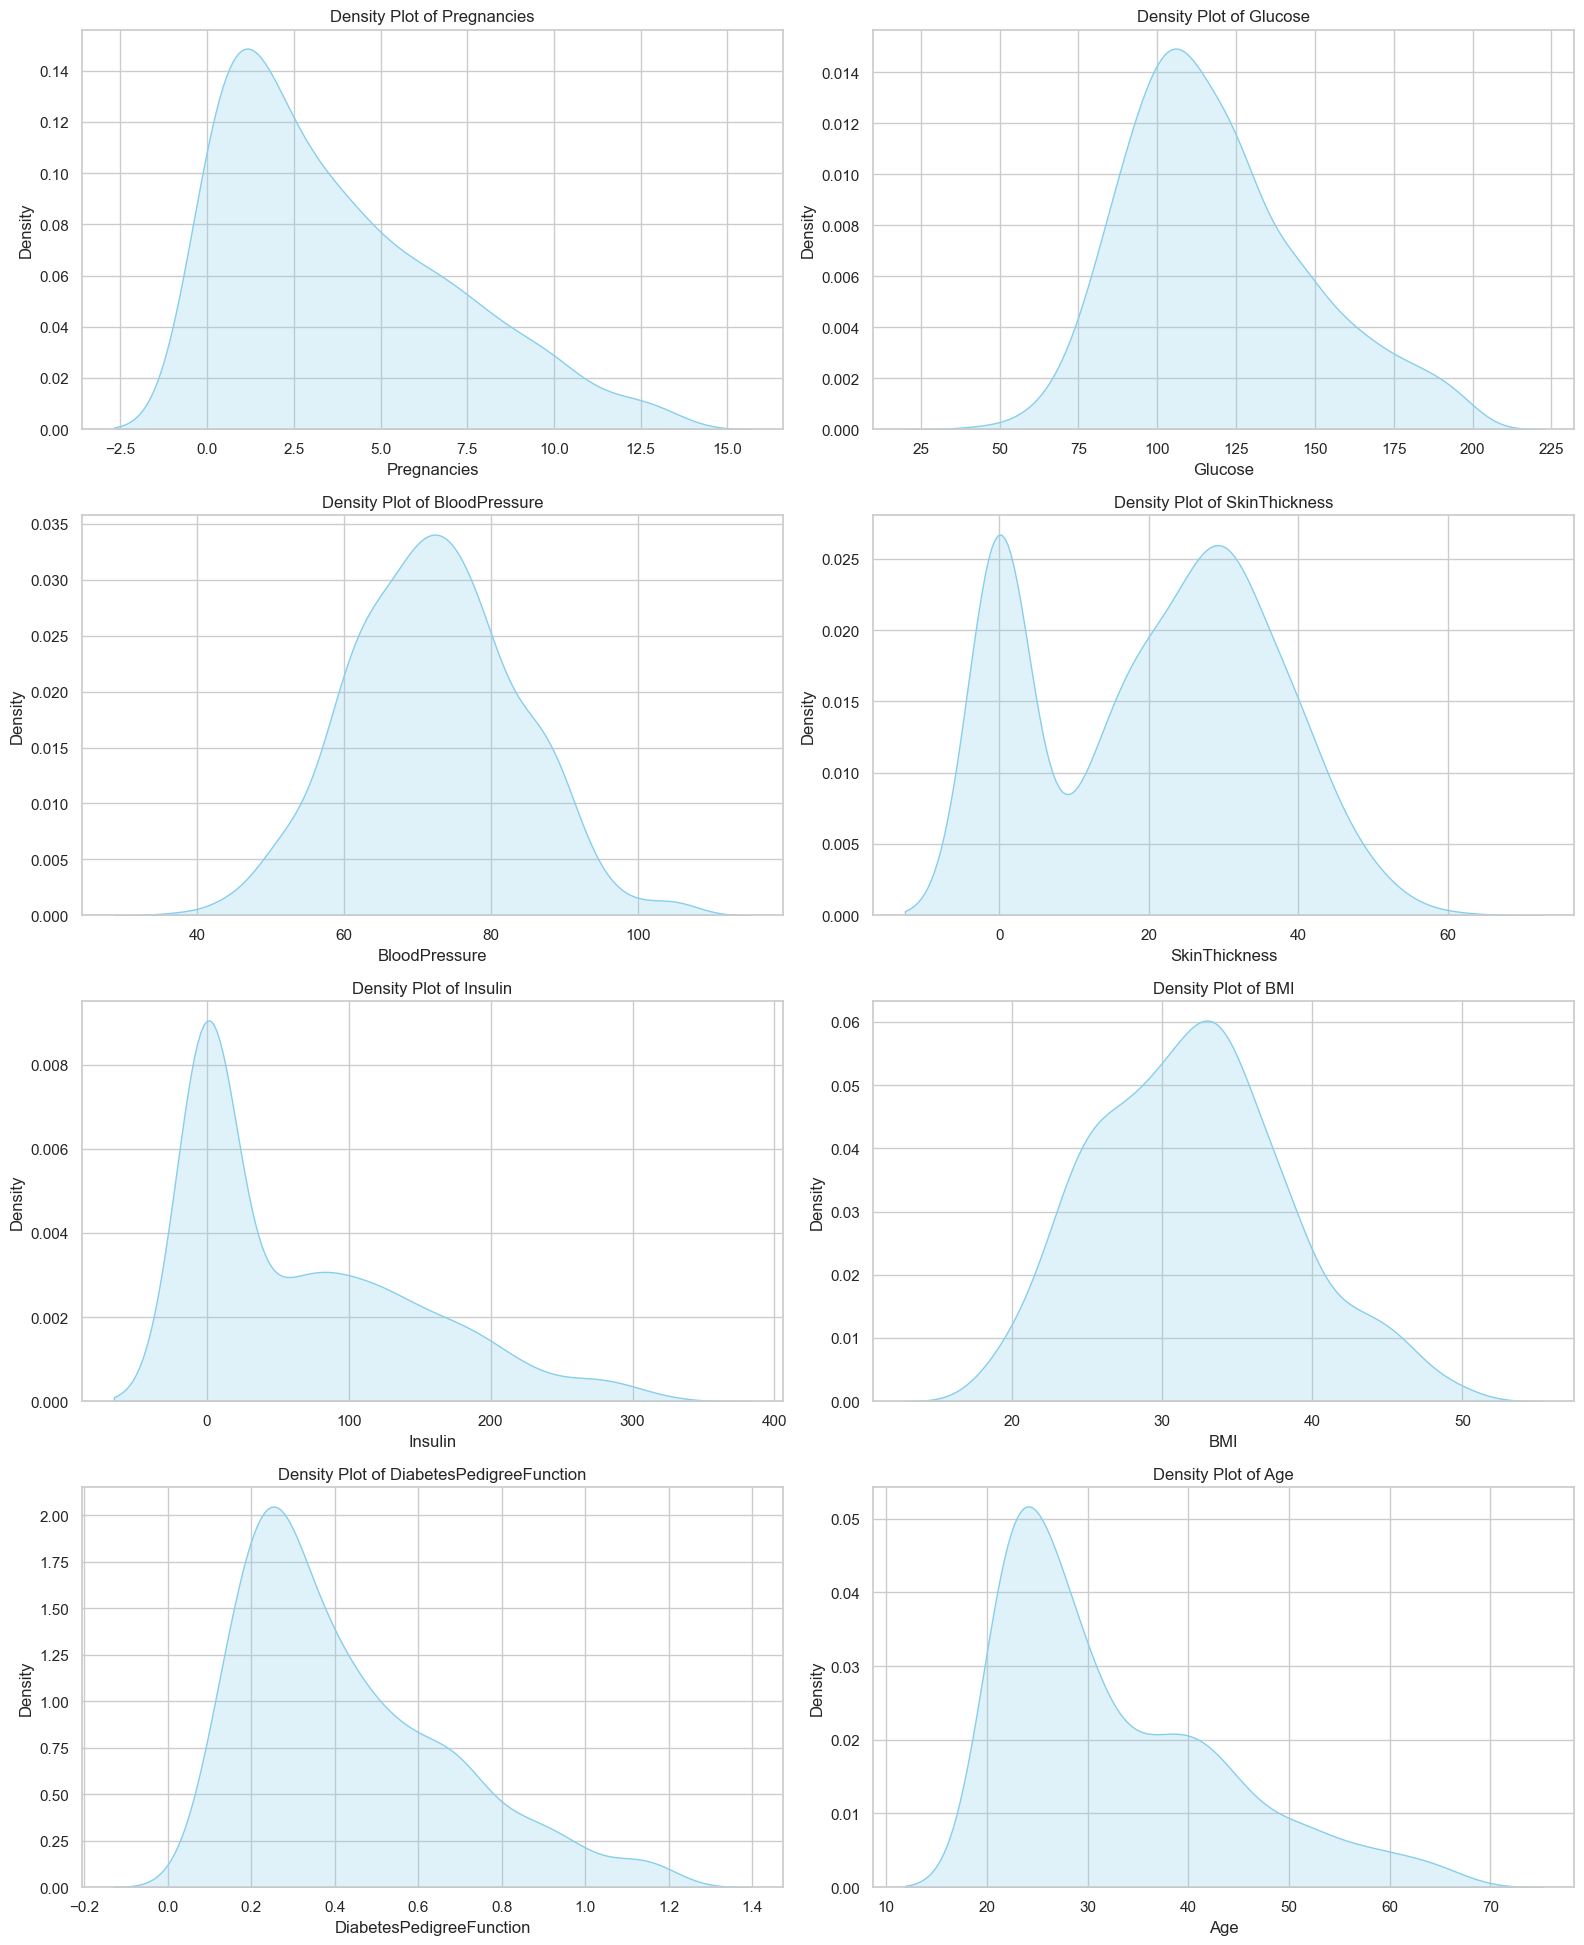

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Generate density plots for each column
plt.figure(figsize=(16, 24))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(df[col], shade=True, color='skyblue')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [33]:
########### 2. Model Building ###############


In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
###  Tune Hyperparameters###

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Update the model with the best parameters
lr_model = grid_search.best_estimator_

Best parameters: {'C': 100}


In [23]:
###### 3. Model Evaluation #####

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print(f"LogisticRegression - Accuracy: {accuracy_lr}")
print(f"LogisticRegression - Precision: {precision_lr}")
print(f"LogisticRegression - Recall: {recall_lr}")
print(f"LogisticRegression - F1-Score: {f1_lr}")
print(f"LogisticRegression - ROC-AUC: {roc_auc_lr}")


LogisticRegression - Accuracy: 0.71875
LogisticRegression - Precision: 0.6086956521739131
LogisticRegression - Recall: 0.4375
LogisticRegression - F1-Score: 0.5090909090909091
LogisticRegression - ROC-AUC: 0.8251953125


In [96]:
#### Visualize the Results ####

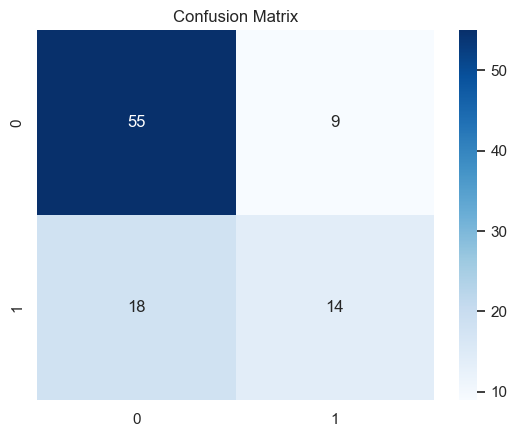

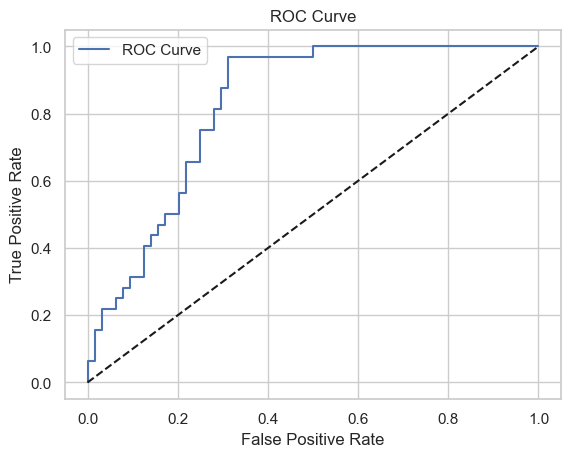

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
########### 2. Model Building ###############

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
#### Tune Hyperparameters ####

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Update the model with the best parameters
dt_model = grid_search.best_estimator_

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [34]:
###### 3. Model Evaluation #####

In [35]:
# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1-Score: {f1_dt}")
print(f"Decision Tree - ROC-AUC: {roc_auc_dt}")

Decision Tree - Accuracy: 0.7604166666666666
Decision Tree - Precision: 0.7142857142857143
Decision Tree - Recall: 0.46875
Decision Tree - F1-Score: 0.5660377358490566
Decision Tree - ROC-AUC: 0.78515625


In [36]:
#### Visualize the Results ####

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC-AUC curve
def plot_roc_auc(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

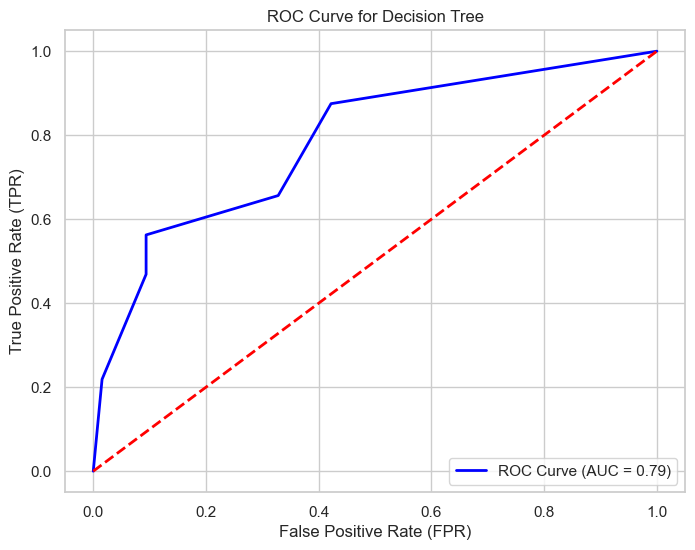

In [38]:
# Plot ROC-AUC for Decision Tree
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_dt, 'Decision Tree')

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

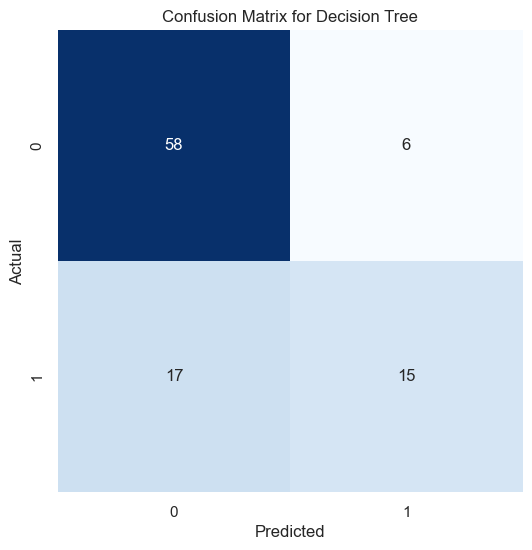

In [40]:
# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')

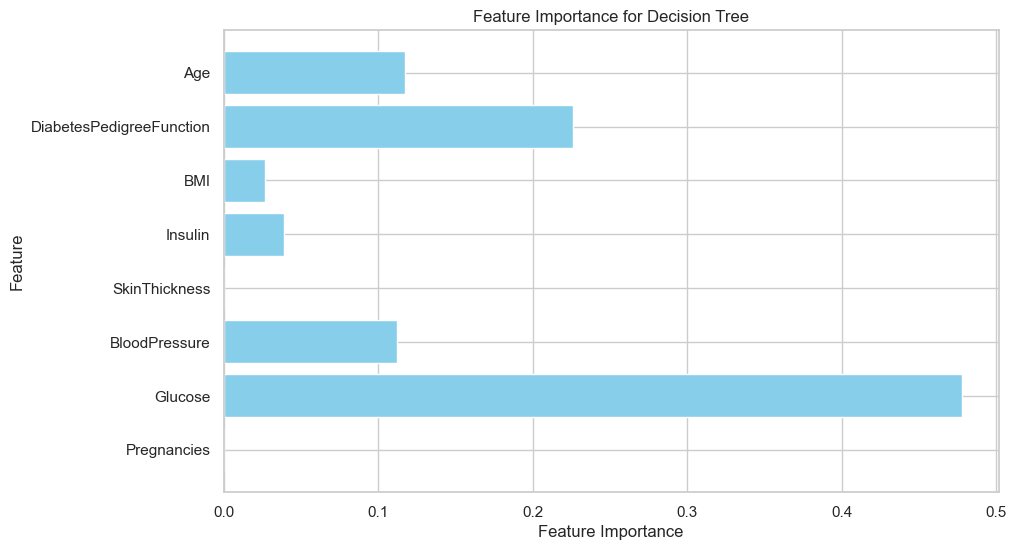

In [41]:
# Get feature importances
importances_dt = dt_model.feature_importances_
feature_names = df.columns[:-1]  # Exclude the target column

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_dt, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree')
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_regression_model(y_true, y_pred, model_name):
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print("-" * 40)



In [43]:
# Predict on the test set
y_pred_dt_reg = dt_model.predict(X_test)

# Evaluate the model
evaluate_regression_model(y_test, y_pred_dt_reg, 'Decision Tree Regressor')

Model: Decision Tree Regressor
Mean Squared Error (MSE): 0.2396
R² Score: -0.0781
Mean Absolute Error (MAE): 0.2396
----------------------------------------


In [59]:
########### 2. Model Building ###############

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
#### Tune Hyperparameters ###

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Update the model with the best parameters
rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}


In [46]:
###### 3. Model Evaluation #####

In [47]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1-Score: {f1_rf}")
print(f"Random Forest - ROC-AUC: {roc_auc_rf}")

Random Forest - Accuracy: 0.75
Random Forest - Precision: 0.9
Random Forest - Recall: 0.28125
Random Forest - F1-Score: 0.4285714285714286
Random Forest - ROC-AUC: 0.88623046875


In [48]:
#### Visualize the Results ####

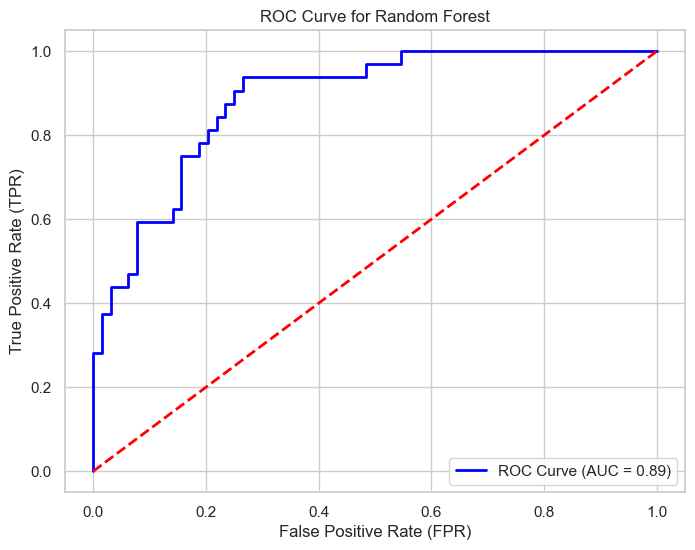

In [49]:
# Plot ROC-AUC for Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_rf, 'Random Forest')

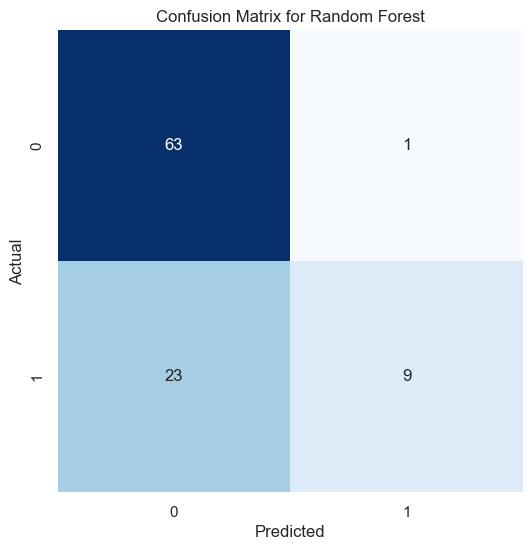

In [50]:
# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

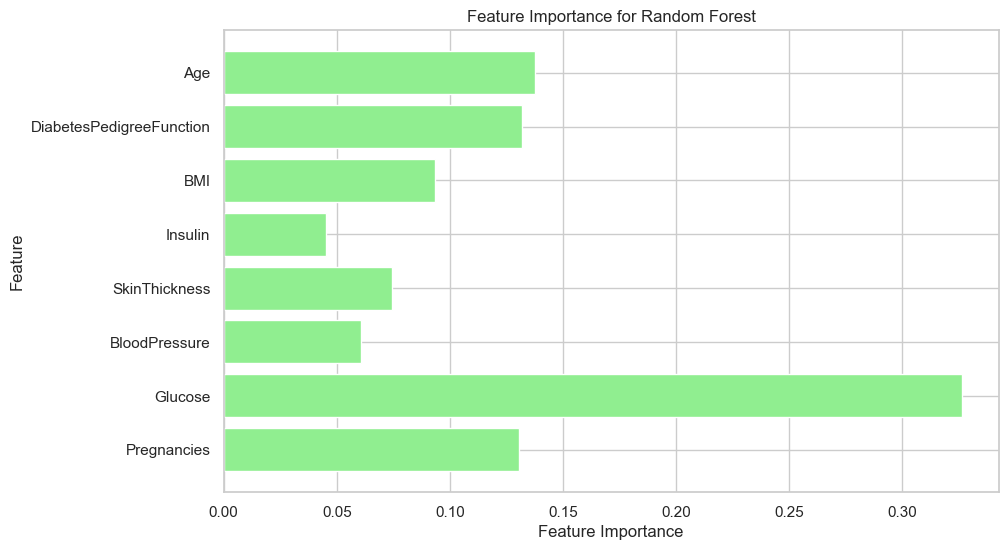

In [51]:
# Get feature importances
importances_rf = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_rf, color='lightgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

In [52]:
# Predict on the test set
y_pred_rf_reg = rf_model.predict(X_test)

# Evaluate the model
evaluate_regression_model(y_test, y_pred_rf_reg, 'Random Forest Regressor')

Model: Random Forest Regressor
Mean Squared Error (MSE): 0.2500
R² Score: -0.1250
Mean Absolute Error (MAE): 0.2500
----------------------------------------


In [53]:
########### 2. Model Building ###############

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
#### Tune Hyperparameters ####

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_val, y_val)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Update the model with the best parameters
knn_model = grid_search.best_estimator_

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


In [56]:
###### 3. Model Evaluation #####

In [57]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

print(f"KNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1-Score: {f1_knn}")
print(f"KNN - ROC-AUC: {roc_auc_knn}")

KNN - Accuracy: 0.71875
KNN - Precision: 0.6923076923076923
KNN - Recall: 0.28125
KNN - F1-Score: 0.4
KNN - ROC-AUC: 0.807861328125


In [58]:
#### Visualize the Results ####

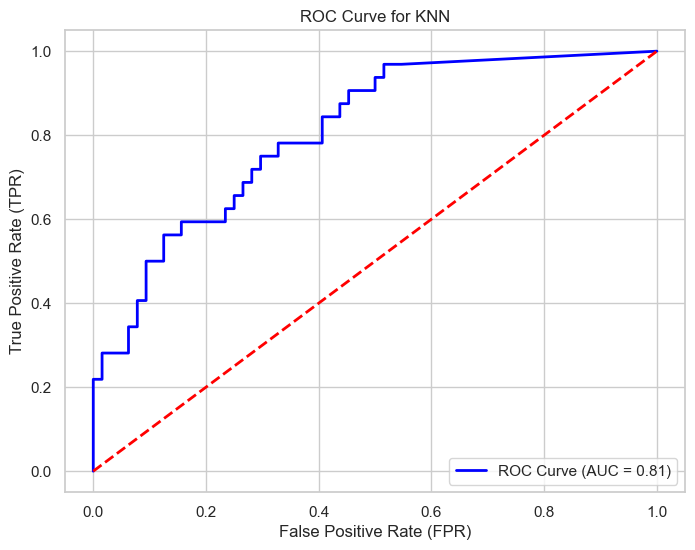

In [59]:
# Plot ROC-AUC for KNN
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]
plot_roc_auc(y_test, y_pred_proba_knn, 'KNN')

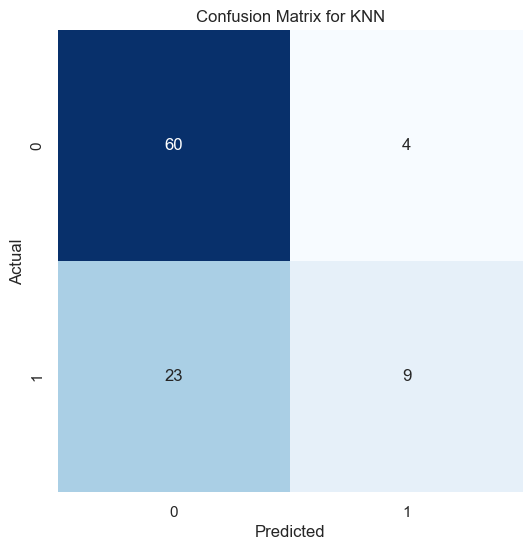

In [60]:
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')


In [61]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
evaluate_regression_model(y_test, y_pred_knn, 'KNN ')

Model: KNN 
Mean Squared Error (MSE): 0.2812
R² Score: -0.2656
Mean Absolute Error (MAE): 0.2812
----------------------------------------


In [82]:
### Comparison of Models ###

In [62]:
# Create a comparison table
comparison = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_knn],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_knn],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_knn],
    'ROC-AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_knn]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

                 Model  Accuracy  Precision   Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.718750   0.608696  0.43750  0.509091  0.825195
1        Decision Tree  0.760417   0.714286  0.46875  0.566038  0.785156
2        Random Forest  0.750000   0.900000  0.28125  0.428571  0.886230
3                  KNN  0.718750   0.692308  0.28125  0.400000  0.807861


In [63]:
##### 4. Model Deployment ####

In [65]:
# Save the best model 
import joblib

joblib.dump(rf_model, 'best_model.pkl')

['best_model.pkl']

In [69]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pickle
import uvicorn
import nest_asyncio

nest_asyncio.apply()

with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = FastAPI()

class InputData(BaseModel):
    Pregnancies: float
    Glucose: float
    BloodPressure: float
    SkinThickness: float
    Insulin: float
    BMI: float
    DiabetesPedigreeFunction: float
    Age: float

@app.post("/predict/")
def predict(data: InputData):
    input_data = np.array([[data.Pregnancies, data.Glucose, data.BloodPressure, 
                            data.SkinThickness, data.Insulin, data.BMI, 
                            data.DiabetesPedigreeFunction, data.Age]])
    
    # Get predicted probabilities
    prediction_proba = model.predict_proba(input_data)[0]
    
    threshold = 0.4  # Adjust threshold based on ROC analysis
    prediction = 1 if prediction_proba[1] >= threshold else 0

    # Format response
    result = {
        "prediction": prediction,
        "confidence": {
            "class_0": round(prediction_proba[0], 4),
            "class_1": round(prediction_proba[1], 4)
        }
    }
    return result

@app.get("/")
def home():
    return {"message": "Hi"}

if __name__ == "__main__":
    uvicorn.run(app, host="127.0.0.1", port=8088)


INFO:     Started server process [53909]
INFO:     Waiting for application startup.


INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8088 (Press CTRL+C to quit)


INFO:     127.0.0.1:60325 - "POST /predict/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [53909]
